# Data Science 1 - Tutorial 5.3 - Classification

## The Breast Cancer Wisconsin Dataset

For this exercise we will use the [the breast cancer wisconsin dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [36]:
# Run this
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the data

In [37]:
# Load the dataset
bc_data = load_breast_cancer()

# Print the desription
print(bc_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [38]:
# Save the dataset into a DataFrame
# As the column names, take feature_names for the explanatory variables
# and "type" for the response

bc_df = pd.DataFrame(bc_data.data,
                    columns=bc_data.feature_names)
bc_df['type'] = pd.Series(bc_data.target)

bc_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


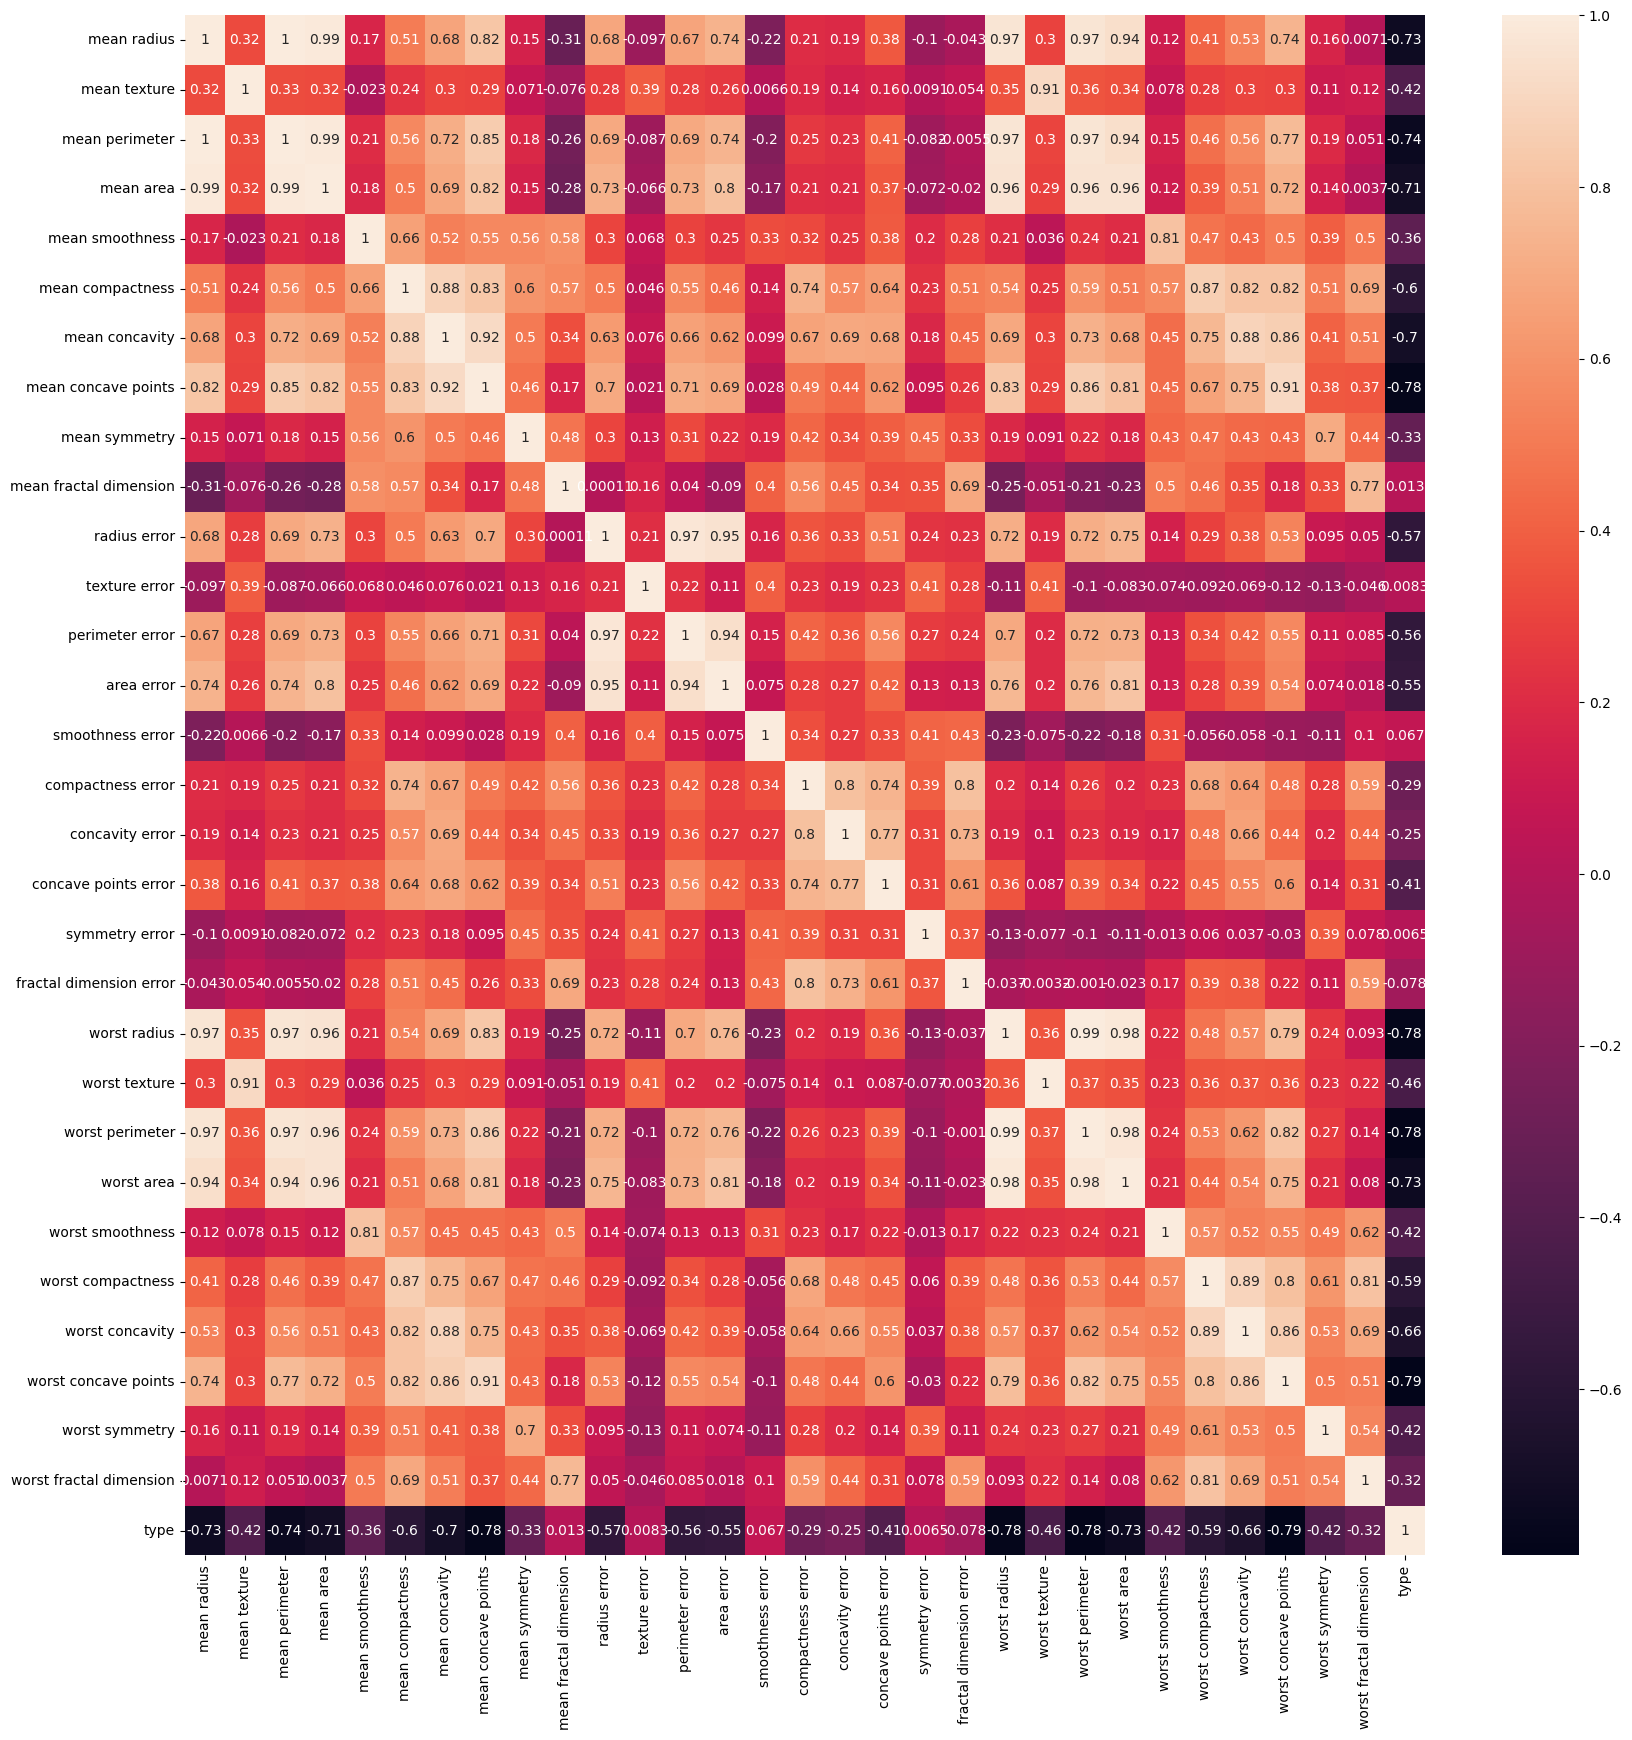

In [39]:
# We've seen a pairplot before, here we introduce a heatmap
# to display all the pairwise correlation values
plt.figure(figsize=(20,20))

# Use heatmap from seaborn
sns.heatmap(bc_df.corr(), #correlation values of bc_df
           annot=True);


In [40]:
# Map the values of "type" in bc_df into: 0:"malignant", 1:"benign"
print(bc_df['type'])
print(bc_df['type'].dtype)
bc_df['type'] = bc_df.type.map({0:"malignant",
                               1:"benign"})

# Display the value counts for each malignant and benign class
bc_df['type'].value_counts()

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: type, Length: 569, dtype: int32
int32


benign       357
malignant    212
Name: type, dtype: int64

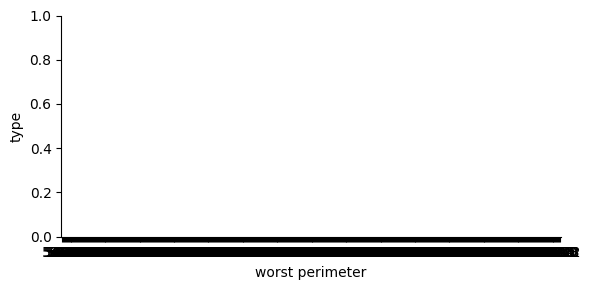

In [26]:
# This is just an example of another type of display, catplot
# Run this and optionally, find out how you can change the kind of the plot
sns.catplot(x="worst perimeter", y="type", data=bc_df, kind="box",
           height=3, aspect=2);

### Splitting the data

In [7]:
# Perform an 80/20 train-test-split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc_df.drop('type', axis=1),
                                                    bc_df['type'], # Use the DataFrame
                                                    stratify=bc_df['type'], # Stratify the split!
                                                    test_size=0.2,
                                                    random_state=123)

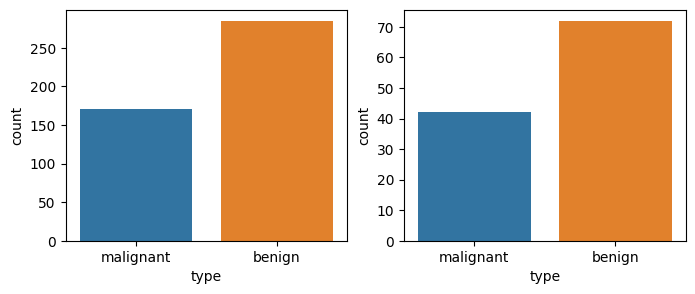

In [8]:
# Let's display the stratified data split
# Simply run this
fig, ax =plt.subplots(1,2, figsize=(8,3)) #, sharey=True)
sns.countplot(x=y_train, ax=ax[0], order=["malignant", "benign"])
sns.countplot(x=y_test, ax=ax[1], order=["malignant", "benign"]);

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Complete the following

# Instantiate the tree
model_tree = DecisionTreeClassifier()

# Fit the tree to the training set
model_tree.fit(X_train, y_train)

print('Training accuracy: ', model_tree.score(X_train, y_train))

Training accuracy:  1.0


### Evaluation Metrics

              precision    recall  f1-score   support

      benign       0.95      0.88      0.91        72
   malignant       0.81      0.93      0.87        42

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



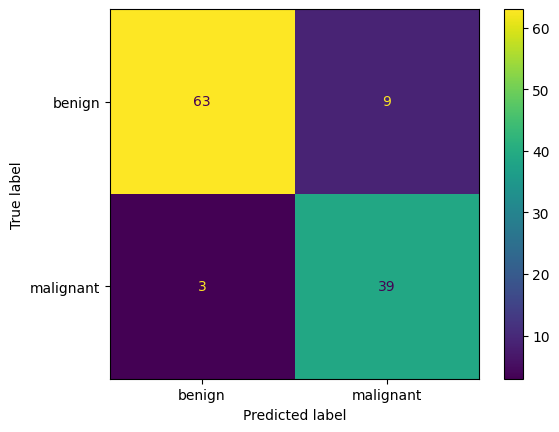

In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Using the fitted model_tree, predict the outcomes from the test set
pred_tree = model_tree.predict(X_test)

# Using the imported metrics, print out the reports
# classification report
print(classification_report(y_test, pred_tree))

# plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model_tree, X_test, y_test)

### Feature Importance

In [11]:
# How can we print out the feature importances?

print(model_tree.feature_importances_)

# These numbers correspond to the columns of the features
print(X_train.columns)

[0.         0.04273917 0.         0.00921177 0.00932499 0.
 0.05757493 0.01755976 0.         0.         0.         0.
 0.         0.         0.00145768 0.         0.         0.
 0.         0.00782594 0.02167183 0.03325883 0.70864257 0.
 0.         0.         0.         0.09073253 0.         0.        ]
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [12]:
# We can collect the feature importances in a DataFrame and sort the values for easier exploration
# Fill in the following to display the sorted feature importance values

pd.DataFrame(index=X_train.columns, # set column names as the index
             data=model_tree.feature_importances_, # feature importance values
             columns=["Feature Importance"] # column name for the feature importance
            ).sort_values("Feature Importance", ascending=False) # sort ascending

,Feature Importance
worst perimeter,0.708643
worst concave points,0.090733
mean concavity,0.057575
mean texture,0.042739
worst texture,0.033259
worst radius,0.021672
mean concave points,0.017560
mean smoothness,0.009325
mean area,0.009212
fractal dimension error,0.007826


### Displaying the Tree

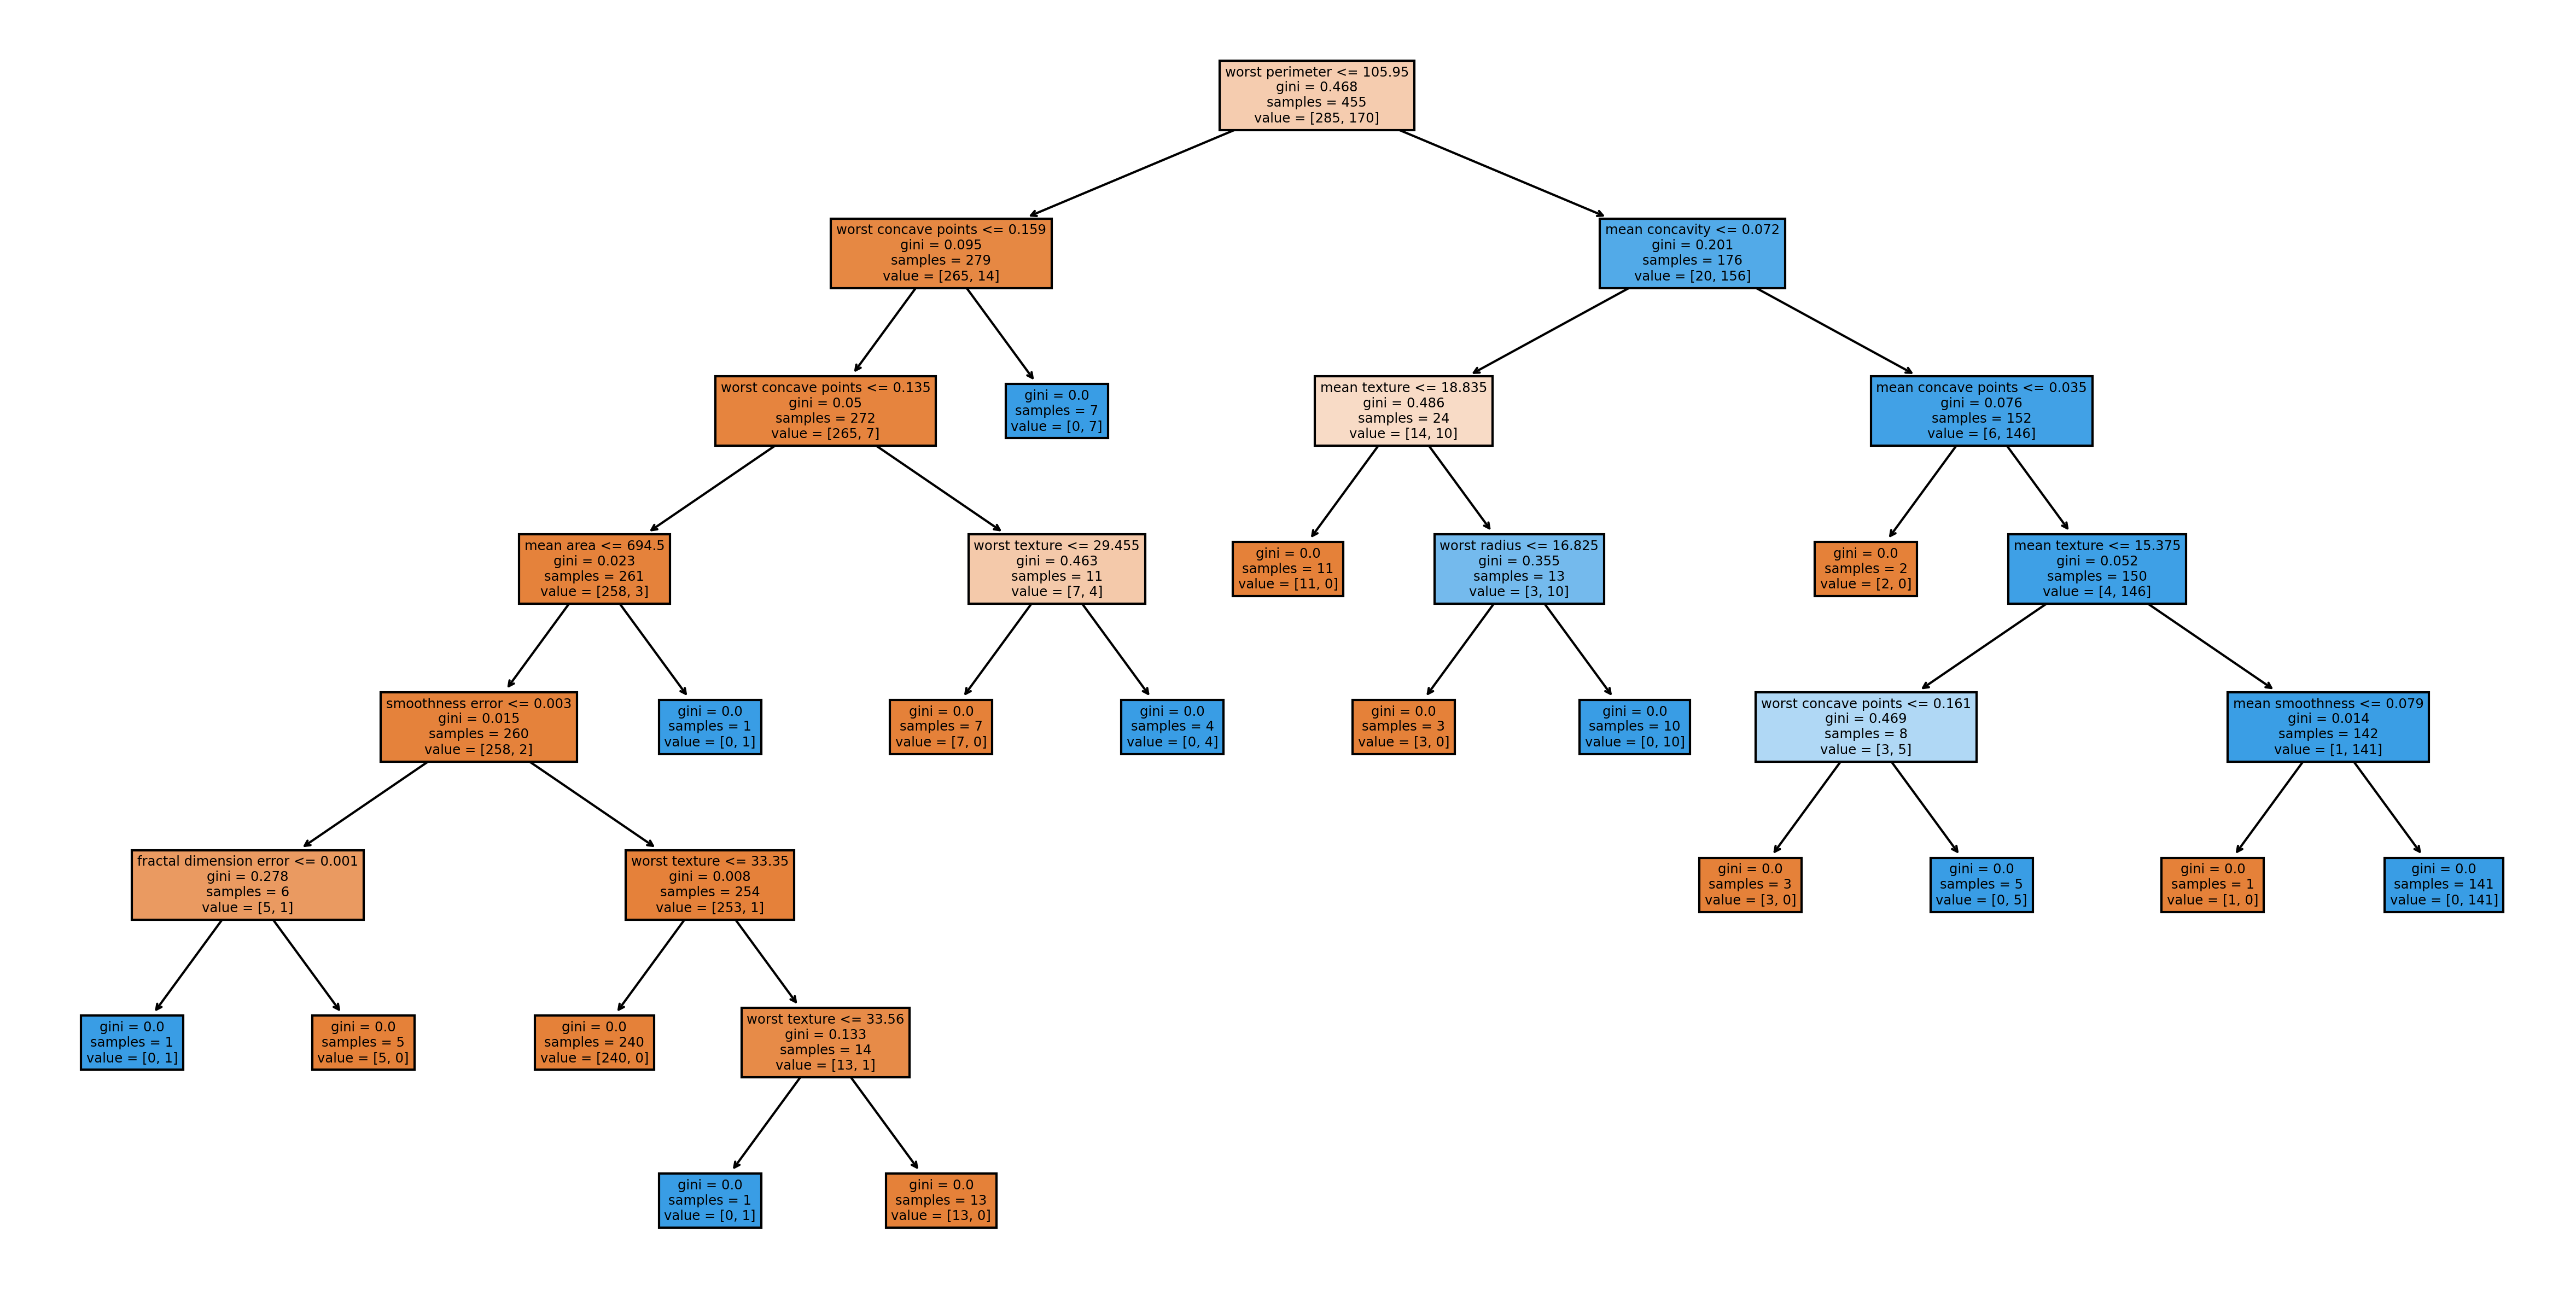

In [13]:
# Run this cell
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10), dpi=300)
plot_tree(model_tree, feature_names=X_train.columns, filled=True);

### Changing some hyperparameters

To see the effects of changing some of the parameters, let's create a function to simplify our reporting task.

In [34]:
## Complete the following
def tree_report(model):
    test_pred = model.predict(X_test) # prediction on the test set

    # print the classification report
    print(classification_report(y_test, test_pred))

    # plot the confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

    # plot the resulting tree
    plt.figure(figsize=(20,10), dpi=300)
    plot_tree(model, feature_names=X_train.columns);

              precision    recall  f1-score   support

      benign       0.97      0.86      0.91        72
   malignant       0.80      0.95      0.87        42

    accuracy                           0.89       114
   macro avg       0.88      0.91      0.89       114
weighted avg       0.91      0.89      0.90       114



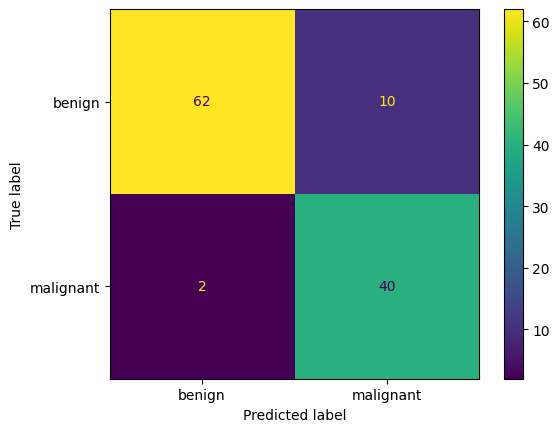

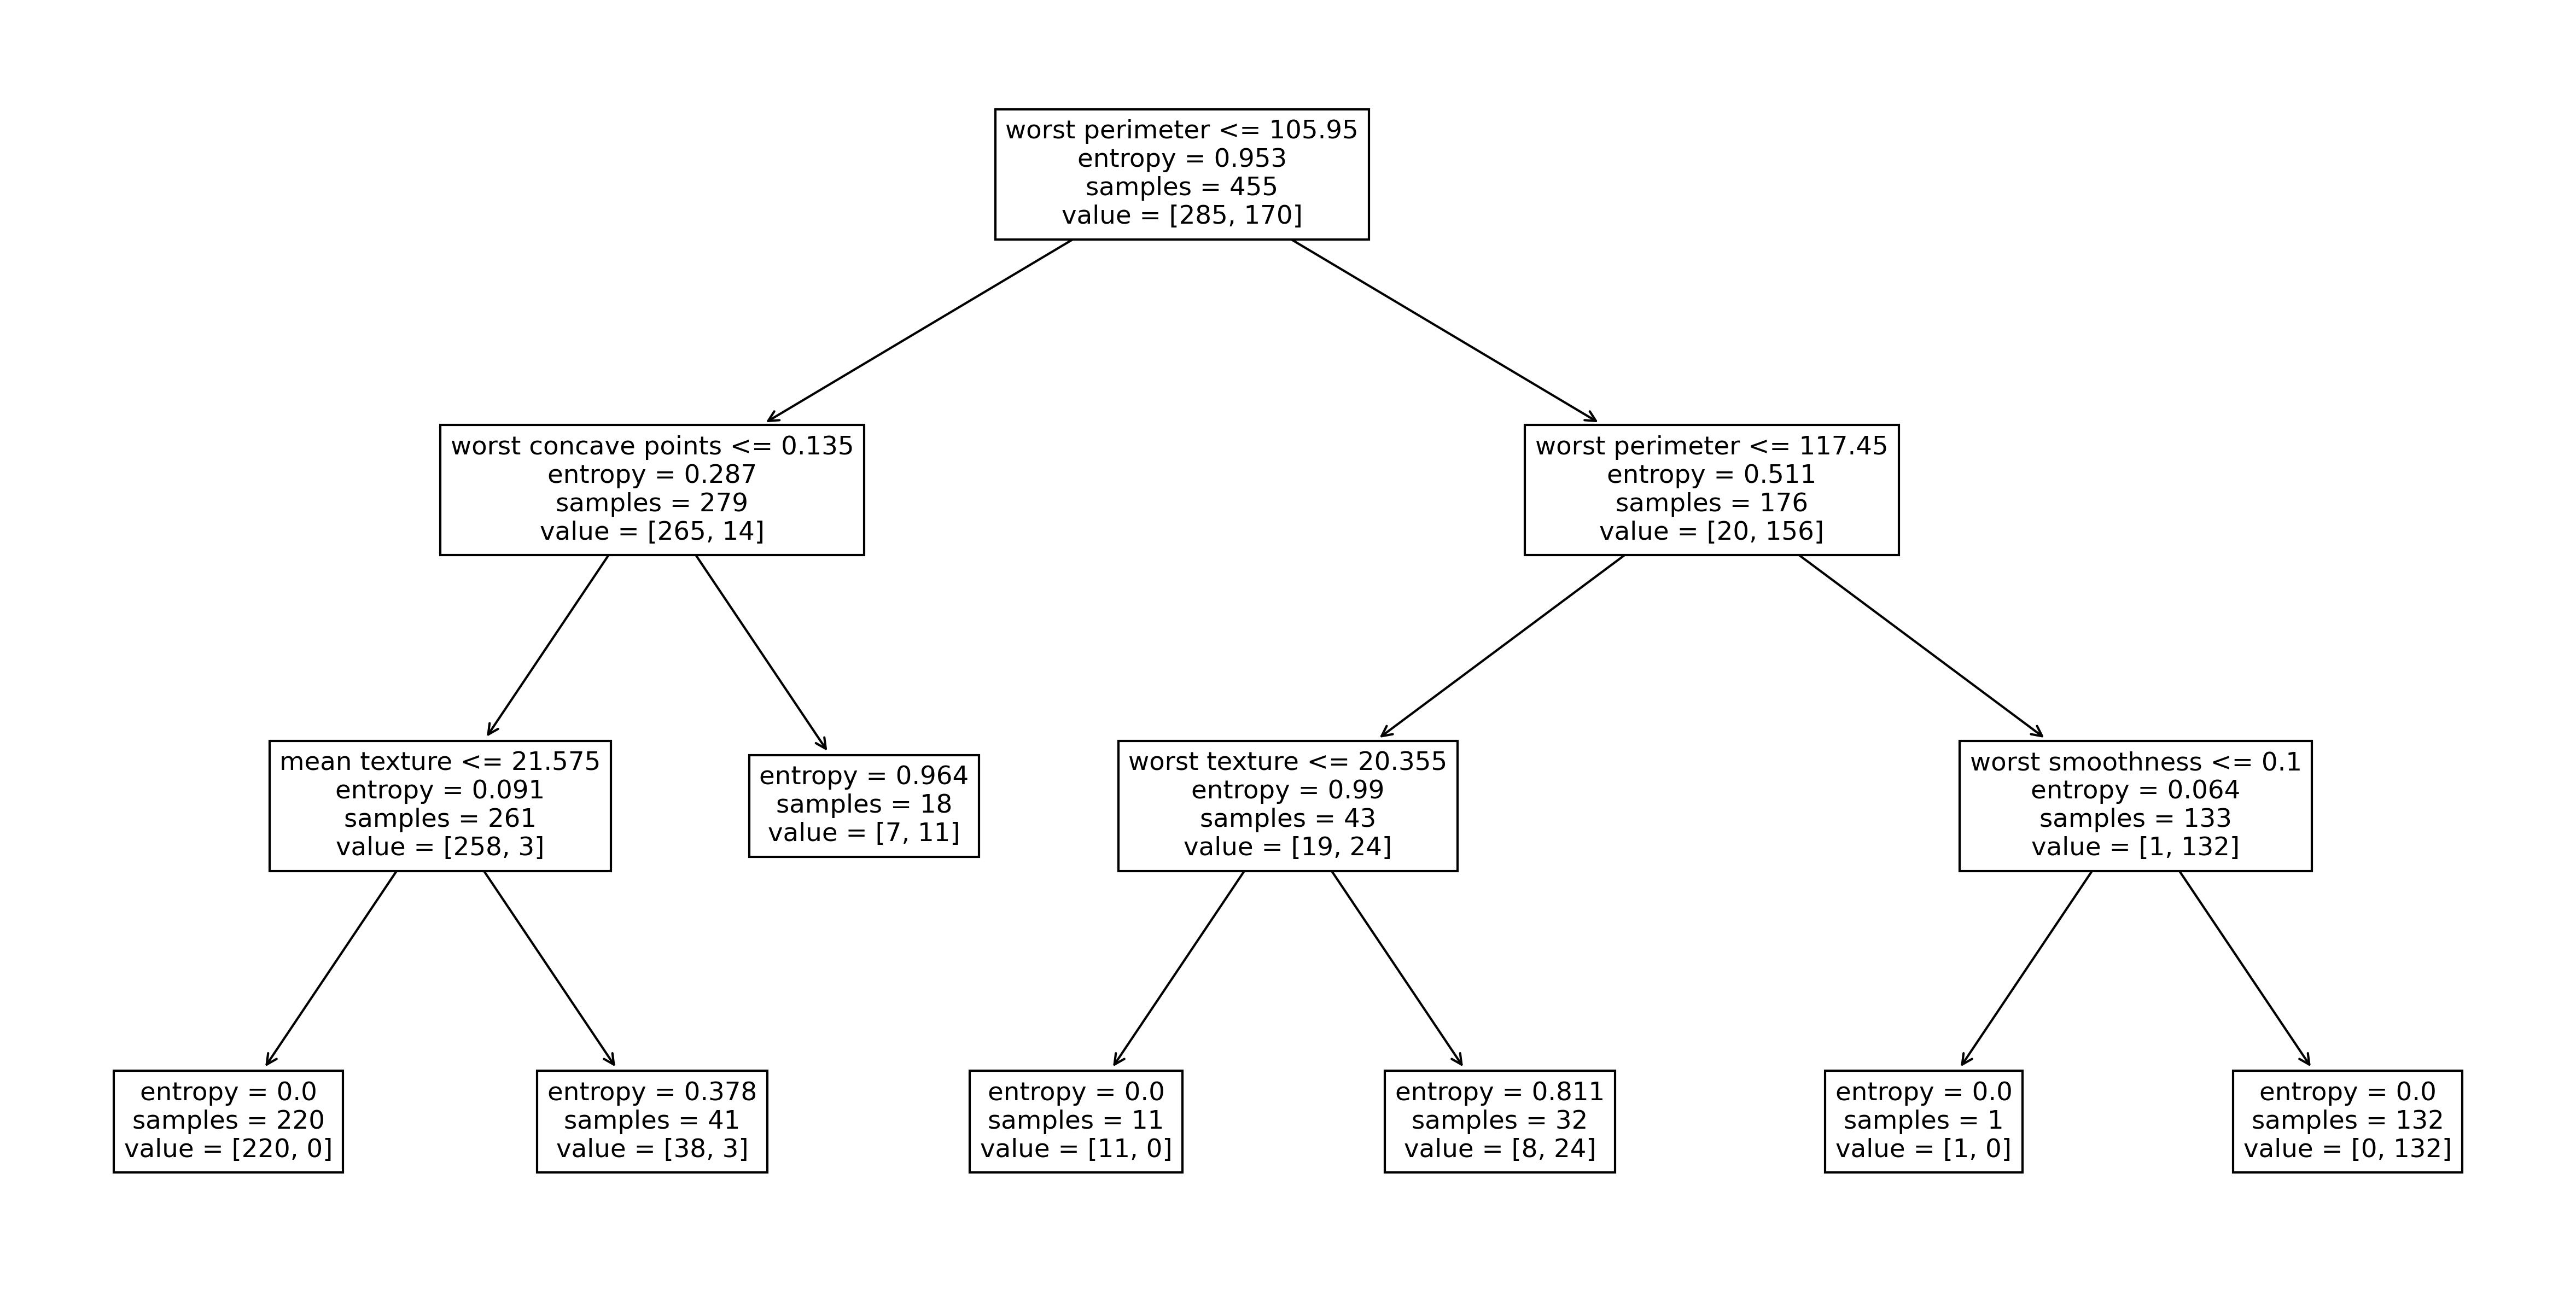

In [35]:
# Initiate a pruned tree with depth=3
model_pruned = DecisionTreeClassifier(criterion="entropy",
                                      min_samples_split=30,
                                      max_depth=3,
                                      random_state=123)

# Fit the pruned tree to the training set
model_pruned.fit(X_train, y_train)

# Generate the report
tree_report(model_pruned)


In [16]:
# Now try changing other hyperparameters and report the performance.

## Random Forests

1. What might be the motivation of random forest (i.e. what are the shortcomings of using a single decision tree)?

**A**: The root node is fixed, not all features may ended up being used, may not find the global optimum. There's potential for overfitting. Also to reduce variance.

2. List two hyperparameters of random forests?

**A**: Number of trees, between 64-128. The number of features in each subset (tree). The convention is $\sqrt(p)$, where $p$ is the number of original features.

3. Explain bagging in random forest.

**A**: The data are bootstrapped and the prediction is aggregated (voting for classification and averaging for regression).

              precision    recall  f1-score   support

      benign       0.99      0.94      0.96        72
   malignant       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



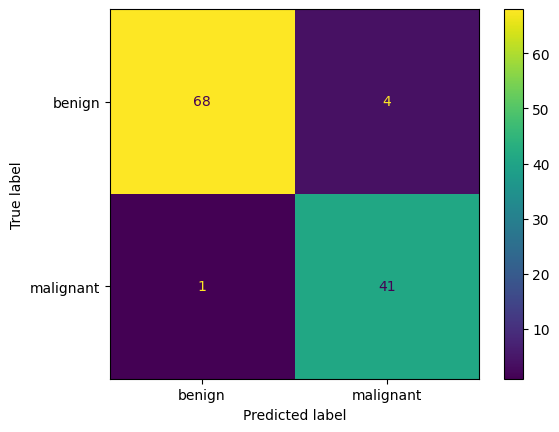

In [36]:
# Complete the following

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=20,#___________, # Set the number of trees to 20
                                 random_state=123)

# Fit the model to the training set
model_rf.fit(X_train, y_train)

# Predict from the test set
pred_rf = model_rf.predict(X_test)

# Print the classification report and plot the confusion matrix
print(classification_report(y_test, pred_rf))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)

### Using Cross Validation for Random Forest

We'll use grid search to decide the two hyperparameters. Later on in the SVM section, we will again use GridSearchCV.

In [18]:
import numpy as np
np.sqrt(30)

5.477225575051661

In [19]:
# Run this cell
from sklearn.model_selection import GridSearchCV

n_estimators = [32, 64, 96, 128, 160]
max_features = [4,5,6,7]
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features}

model_rf = RandomForestClassifier()
grid = GridSearchCV(model_rf, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 5, 6, 7],
                         'n_estimators': [32, 64, 96, 128, 160]})

In [20]:
# Print the best parameters
grid.best_params_

{'max_features': 5, 'n_estimators': 32}

In [21]:
# Fit the model using the best chosen parameters and report the performance
model_rfcv = RandomForestClassifier(max_features=4, n_estimators=96)
model_rfcv.fit(X_train, y_train)
pred_rfcv = model_rfcv.predict(X_test)

              precision    recall  f1-score   support

      benign       0.99      0.97      0.98        72
   malignant       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



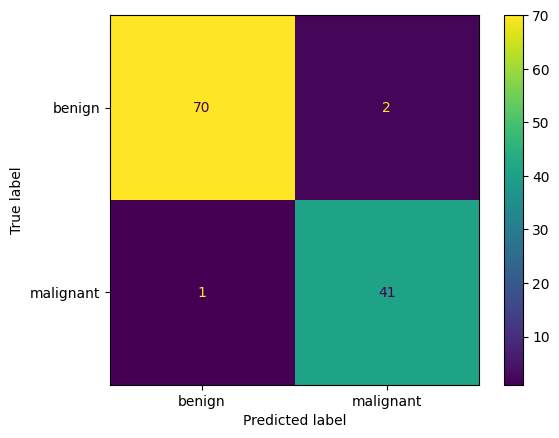

In [37]:
print(classification_report(y_test, pred_rfcv))
ConfusionMatrixDisplay.from_estimator(model_rfcv, X_test, y_test)

### Error vs. number of trees

We'll now use another technique to choose the number of trees, namely, to plot the errors and number of misclassifications against the number of trees.

In [23]:
from sklearn.metrics import accuracy_score

errors = []
misclassifications = []

for n in range(1,200,5):
    # Instantiate, fit, predict
    model = RandomForestClassifier(max_features=4, n_estimators=n)
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)

    e = 1-accuracy_score(y_test, test_pred)
    missed = (y_test!=test_pred).sum() # How to count the misclassified outcomes?

    errors.append(e)
    misclassifications.append(missed)

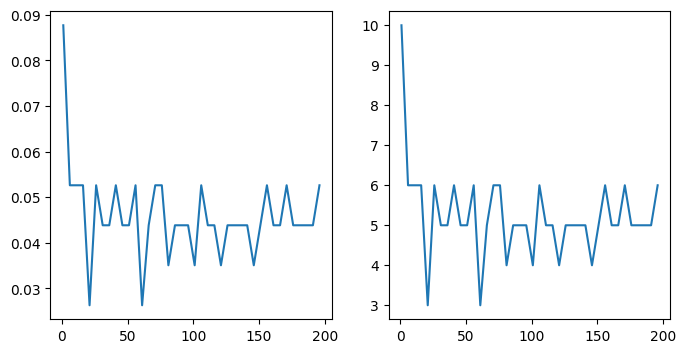

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
# Plot errors and misclassifications side by side
ax1.plot(range(1,200,5), errors)
ax2.plot(range(1,200,5), misclassifications)

## SVM

We'll take a subset of the breast cancer dataframe to illustrate the separating hyperplane.

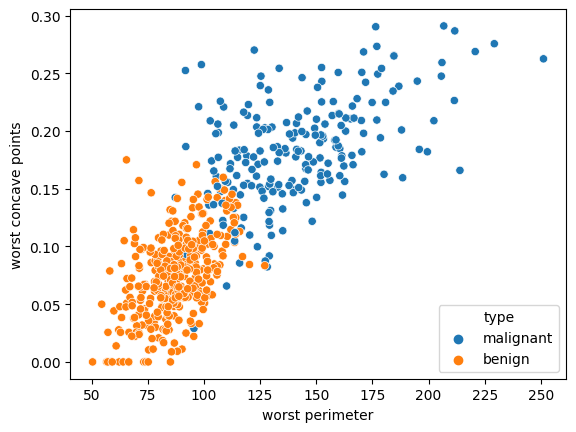

In [25]:
# Take the two columns which have the highest feature importance values (Subsection 2.2 above) and the target column
df = bc_df[["worst perimeter", "worst concave points", "type"]]


sns.scatterplot(x="worst perimeter", y="worst concave points", # The order doesn't matter here
                hue="type", # Differentiate the color based on the outcomes
                data=df);

In [26]:
from sklearn.svm import SVC
#help(SVC)

In [27]:
# Run this helper function
def plot_svm(model,X,y):

    X = X.values

    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1],
                c=y, s=30,cmap='seismic')


    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


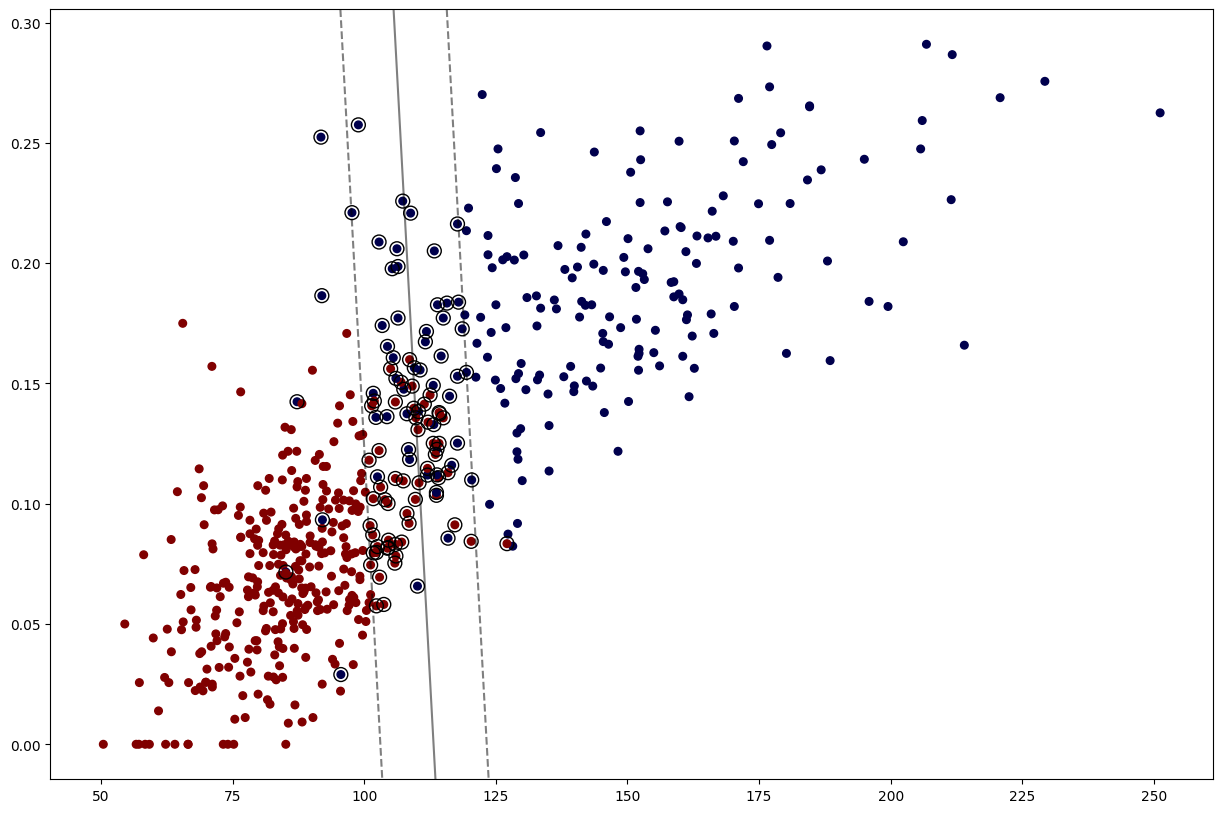

In [28]:
# Also run this
X = df.drop('type', axis=1)
y = bc_data.target

model_svm = SVC(kernel='linear')
model_svm.fit(X,y)

plt.figure(figsize=(15,10))
plot_svm(model_svm, X, y)

Try it yourself:

1. Research: What is kernel in SVM, what is radial basis function?
2. Now plot the decision boundary with the rbf kernel (Simply remove the argument `kernel='linear'` because `rbf` is the default value). Try changing the values of `C` and `gamma`.
3. Use `GridSearchCV` as shown in Section 3.1 to find the best among these hyperparameters:
`'C':[0.01, 0.1, 1, 10]`, `'kernel':['linear','rbf']`.

**A**:
1. Let the transformation to a higher dimensional space be $\boldsymbol{z}=\boldsymbol{\phi}\left(\boldsymbol{x}\right)$, where $\boldsymbol{x}\in\mathbb{R}^{p},\boldsymbol{z}\in\mathbb{R}^{d}, d>p$. The dual is now
$$L_{d}=-\frac{1}{2}\sum_{j}\sum_{k}\alpha^{(j)}\alpha^{(k)}y^{(j)}y^{(k)}\left(\boldsymbol{\phi}\left(\boldsymbol{x}^{(j)}\right)\right)^{\intercal}\boldsymbol{\phi}\left(\boldsymbol{x}^{(k)}\right)+\sum_{j}\alpha^{(j)}.$$

The idea of kernel is to replace the inner product of basis functions, $ \left(\boldsymbol{\phi}\left(\boldsymbol{x}^{(j)}\right)\right)^{\intercal}\boldsymbol{\phi}\left(\boldsymbol{x}^{(k)}\right)$ by a kernel function $K\left(\boldsymbol{x}^{(j)},\boldsymbol{x}^{(k)}\right)$.

Radial-basis function: $K\left(\boldsymbol{x}^{(j)},\boldsymbol{x}\right)=\exp\left(-\frac{\left\Vert \boldsymbol{x}^{(j)}-\boldsymbol{x}\right\Vert ^{2}}{2s^{2}}\right)$, where $s$ indicates the radius.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


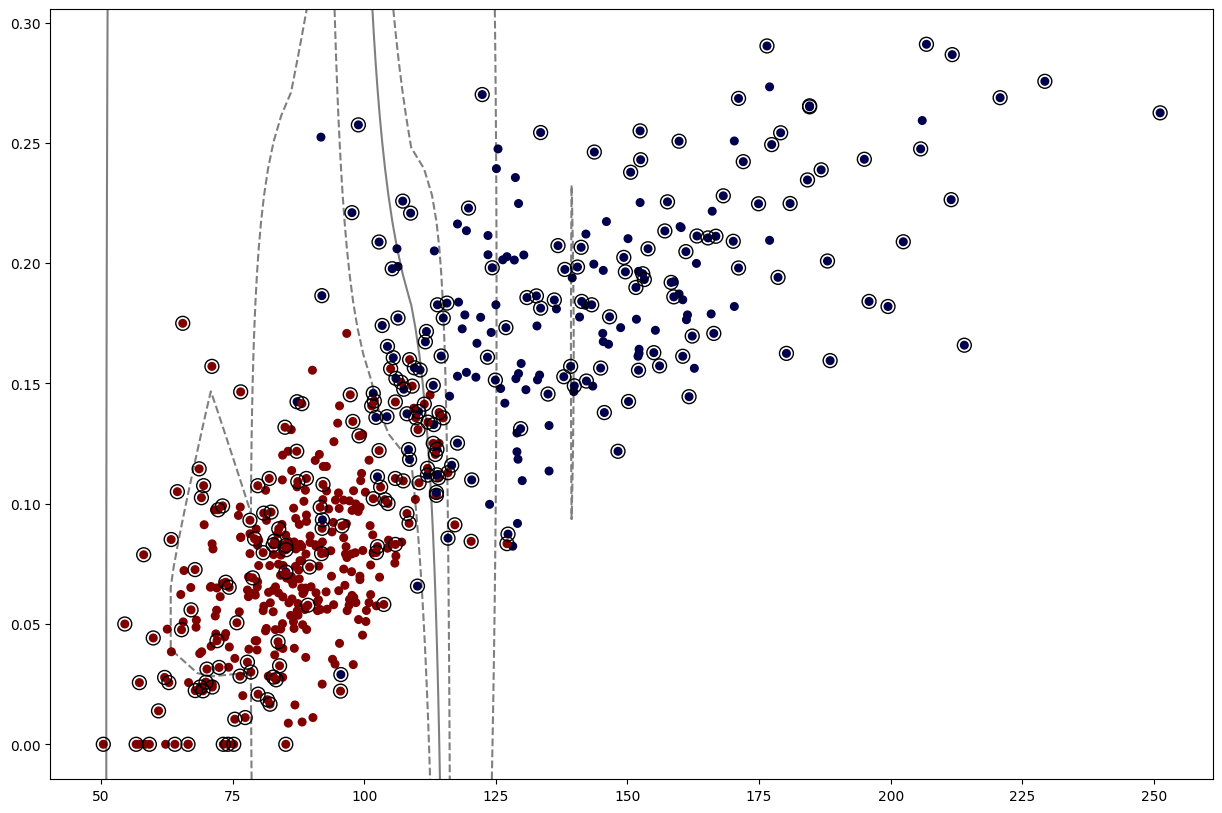

In [29]:
model_svm = SVC(gamma=1, C=100)
model_svm.fit(X,y)

plt.figure(figsize=(15,10))
plot_svm(model_svm, X, y)

In [30]:
svm = SVC()

param_grid = {'C': [0.01, 0.1, 1, 10],
             'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [31]:
grid.best_params_

{'C': 10, 'kernel': 'linear'}